# Dataset

In [105]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras

In [106]:


nflx = yf.Ticker("NFLX")

nflx_hist = nflx.history('MAX')

nflx_hist.reset_index(inplace=True)

nflx_hist,nflx_hist.shape

(                          Date        Open        High         Low  \
 0    2002-05-23 00:00:00-04:00    1.156429    1.242857    1.145714   
 1    2002-05-24 00:00:00-04:00    1.214286    1.225000    1.197143   
 2    2002-05-28 00:00:00-04:00    1.213571    1.232143    1.157143   
 3    2002-05-29 00:00:00-04:00    1.164286    1.164286    1.085714   
 4    2002-05-30 00:00:00-04:00    1.107857    1.107857    1.071429   
 ...                        ...         ...         ...         ...   
 5411 2023-11-20 00:00:00-05:00  465.399994  476.760010  465.399994   
 5412 2023-11-21 00:00:00-05:00  472.630005  477.019989  471.209991   
 5413 2023-11-22 00:00:00-05:00  476.799988  482.700012  476.559998   
 5414 2023-11-24 00:00:00-05:00  477.109985  480.399994  475.200012   
 5415 2023-11-27 00:00:00-05:00  479.029999  482.000000  475.350006   
 
            Close     Volume  Dividends  Stock Splits  
 0       1.196429  104790000        0.0           0.0  
 1       1.210000   11104800      

<Axes: xlabel='Date'>

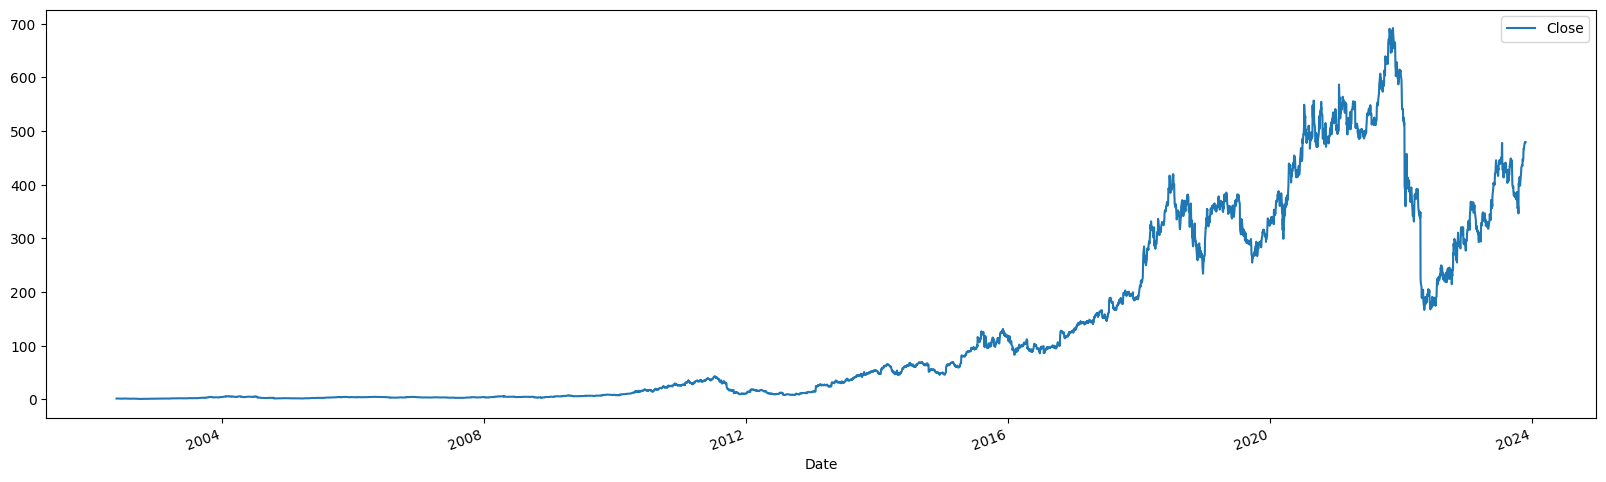

In [107]:
%matplotlib inline
nflx_hist.plot(x='Date', y='Close', kind='line', figsize=(20,6), rot=20)

In [108]:
#nflx_hist = nflx_hist[nflx_hist.Date > '01-01-1990']

# Extracting the closing prices of each day
FullData=nflx_hist[['Close']].values
print(FullData[0:5])
 
# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()
 
DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData
 
print('### After Normalization ###')
X[0:5]

[[1.19642901]
 [1.21000004]
 [1.157143  ]
 [1.10357106]
 [1.07142901]]
### After Normalization ###


array([[0.00119131],
       [0.00121094],
       [0.00113448],
       [0.00105699],
       [0.00101049]])

# Modelo para predecir 1 dia

In [109]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=50  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(5366, 50, 1)

#### Output Data shape ####
(5366, 1)


In [110]:
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5361, 50, 1)
(5361, 1)

#### Testing Data shape ####
(5, 50, 1)
(5, 1)


In [111]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.00119131]
 [0.00121094]
 [0.00113448]
 [0.00105699]
 [0.00101049]
 [0.00101773]
 [0.00109315]
 [0.00107765]
 [0.00112002]
 [0.00117064]
 [0.00107869]
 [0.00113345]
 [0.00112931]
 [0.00104149]
 [0.00102703]
 [0.00088754]
 [0.00079455]
 [0.00077802]
 [0.00083691]
 [0.00084518]
 [0.00087721]
 [0.00087617]
 [0.00085551]
 [0.00089064]
 [0.00082555]
 [0.00090614]
 [0.00094747]
 [0.00115721]
 [0.00121714]
 [0.00130703]
 [0.00116134]
 [0.00113965]
 [0.00114378]
 [0.0012967 ]
 [0.00120784]
 [0.00111382]
 [0.00109005]
 [0.00103632]
 [0.00112312]
 [0.00113861]
 [0.00115411]
 [0.00111898]
 [0.00107249]
 [0.00095987]
 [0.00072119]
 [0.00072842]
 [0.00078318]
 [0.00084001]
 [0.00075012]
 [0.00058584]] -- [0.00058171]
[[0.00121094]
 [0.00113448]
 [0.00105699]
 [0.00101049]
 [0.00101773]
 [0.00109315]
 [0.00107765]
 [0.00112002]
 [0.00117064]
 [0.00107869]
 [0.00113345]
 [0.00112931]
 [0.00104149]
 [0.00102703]
 [0.00088754]
 [0.00079455]
 [0.00077802]
 [0.00083691]
 [0.00084518]
 [0.00087721]
 [0

In [112]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [113]:
keras.utils.set_random_seed(42)

# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))
 
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 10, epochs = 20, )
 
EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/20
537/537 [==============================] - 17s 25ms/step - loss: 0.0131
Epoch 2/20
537/537 [==============================] - 13s 24ms/step - loss: 9.7140e-04
Epoch 3/20
537/537 [==============================] - 13s 25ms/step - loss: 8.7884e-04
Epoch 4/20
537/537 [==============================] - 13s 24ms/step - loss: 8.1407e-04
Epoch 5/20
537/537 [==============================] - 13s 24ms/step - loss: 7.2798e-04
Epoch 6/20
537/537 [==============================] - 13s 24ms/step - loss: 6.2633e-04
Epoch 7/20
537/537 [==============================] - 13s 25ms/step - loss: 5.2323e-04
Epoch 8/20
537/537 [==============================] - 13s 24ms/step - loss: 4.8356e-04
Epoch 9/20
537/537 [==============================] - 12s 22ms/step - loss: 4.1969e-04
Epoch 10/20
537/537 [==============================] - 12s 23ms/step - loss: 3.5718e-04
Epoch 11/20
537/537 [==============================] - 12s 22ms/step - loss: 3.5293e-04
Epoch 12/20
537/537 [========================

1/1 [==============================] - 1s 559ms/step
Accuracy: 96.40060128102586


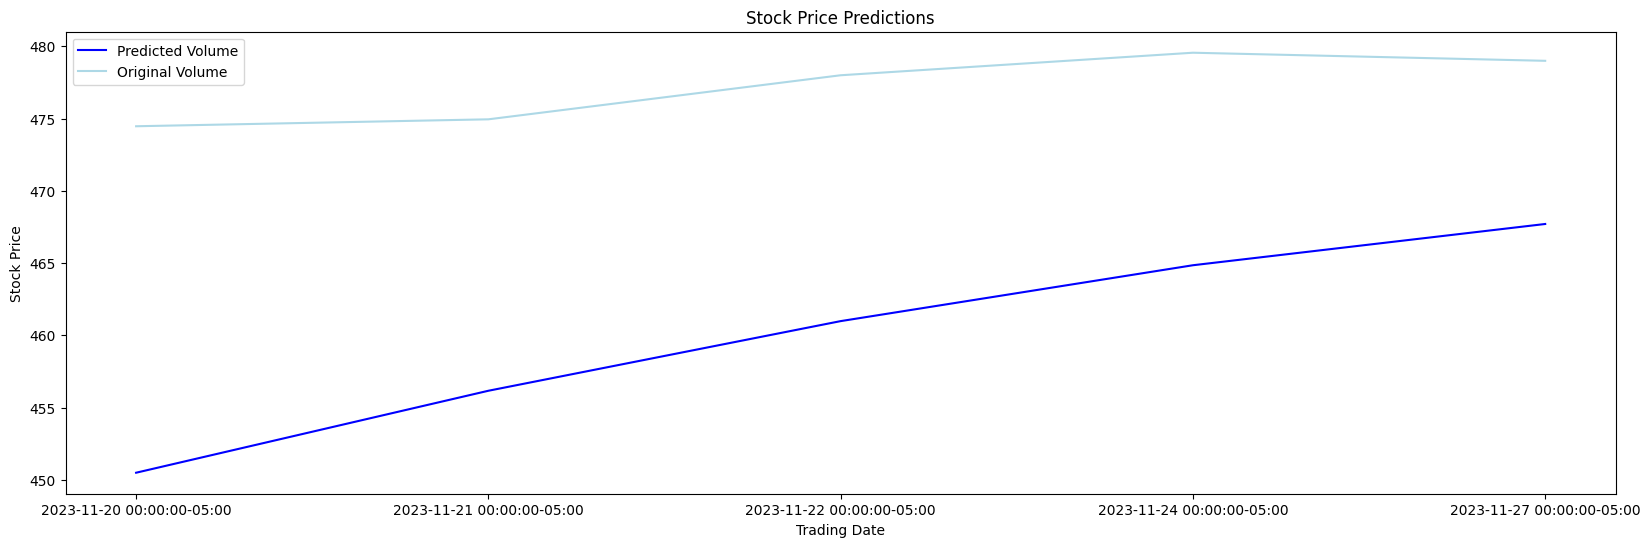

In [114]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
 
# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())
 
# Visualising the results
import matplotlib.pyplot as plt
 
plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), nflx_hist.tail(TestingRecords)['Date'])
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 53ms/step


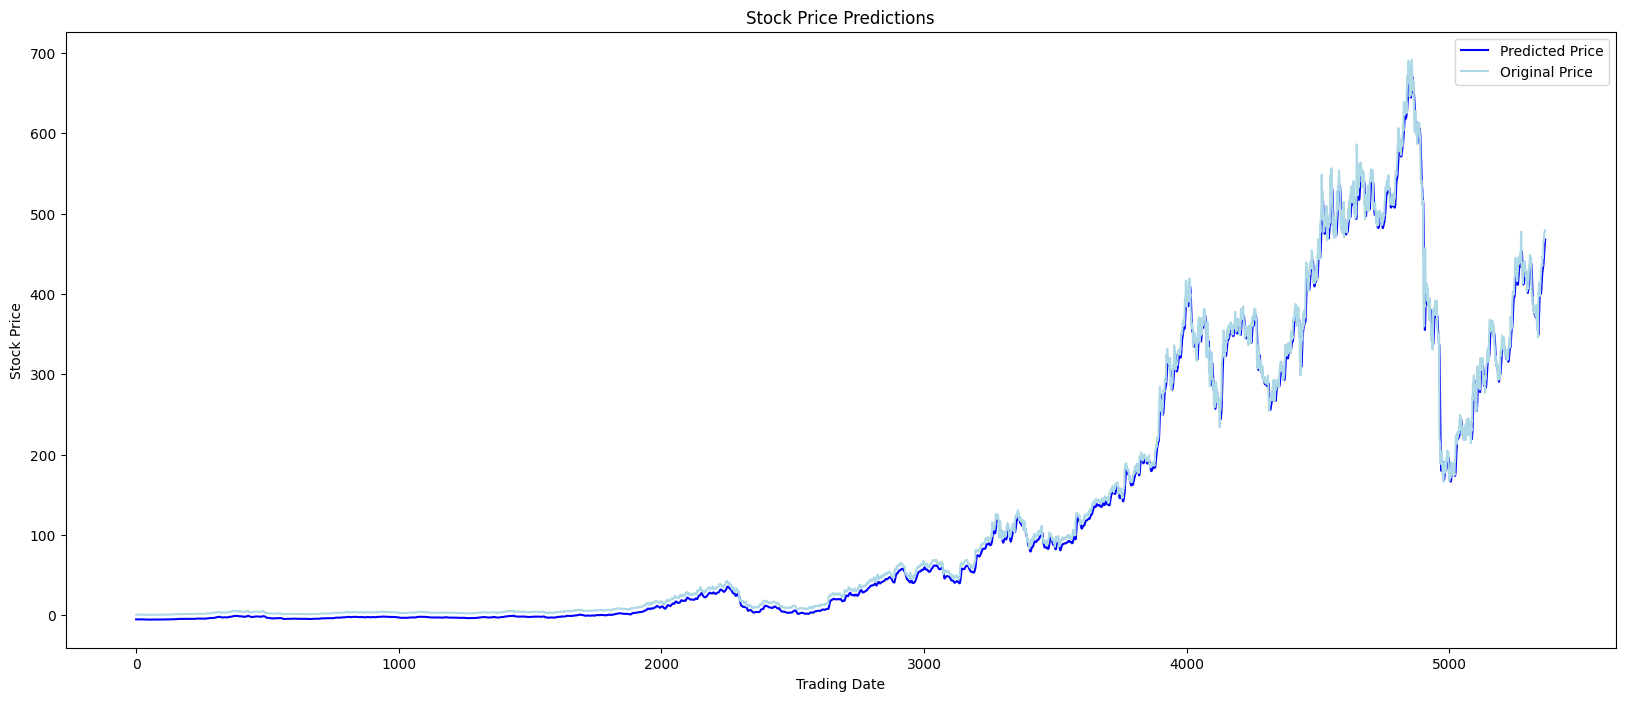

In [115]:

# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))
 
FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]
 
# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')
 
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [116]:
FullData[-51:-1]

array([[396.94000244],
       [394.3999939 ],
       [396.20001221],
       [386.29998779],
       [384.1499939 ],
       [379.80999756],
       [384.79998779],
       [379.25      ],
       [377.58999634],
       [376.35998535],
       [377.6000061 ],
       [380.32998657],
       [376.75      ],
       [376.8999939 ],
       [372.58999634],
       [381.51000977],
       [385.95001221],
       [373.32000732],
       [365.92999268],
       [361.20001221],
       [355.67999268],
       [360.82000732],
       [355.72000122],
       [346.19000244],
       [401.76998901],
       [400.95999146],
       [406.83999634],
       [413.73001099],
       [411.25      ],
       [403.54000854],
       [397.86999512],
       [410.07998657],
       [411.69000244],
       [420.19000244],
       [424.70999146],
       [432.35998535],
       [434.73999023],
       [434.60998535],
       [436.6499939 ],
       [435.1499939 ],
       [447.23999023],
       [444.61999512],
       [448.6499939 ],
       [461

In [117]:

# Last 10 days prices
LastDays=FullData[-51:-1]
 
# Normalizing the data just like we did for training the model
LastDays=DataScaler.transform(LastDays.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=50
NumFeatures=1
LastDays=LastDays.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(LastDays)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 31ms/step


array([[467.70465]], dtype=float32)

In [118]:
diff = predicted_Price-FullData[-1]
diff[0][0]

-11.29534912109375

# Modelos multi-step para predecir varios dias

In [119]:

# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-50:])
 
print('###################')
 
# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-50:])

Original Prices
[[394.3999939 ]
 [396.20001221]
 [386.29998779]
 [384.1499939 ]
 [379.80999756]
 [384.79998779]
 [379.25      ]
 [377.58999634]
 [376.35998535]
 [377.6000061 ]
 [380.32998657]
 [376.75      ]
 [376.8999939 ]
 [372.58999634]
 [381.51000977]
 [385.95001221]
 [373.32000732]
 [365.92999268]
 [361.20001221]
 [355.67999268]
 [360.82000732]
 [355.72000122]
 [346.19000244]
 [401.76998901]
 [400.95999146]
 [406.83999634]
 [413.73001099]
 [411.25      ]
 [403.54000854]
 [397.86999512]
 [410.07998657]
 [411.69000244]
 [420.19000244]
 [424.70999146]
 [432.35998535]
 [434.73999023]
 [434.60998535]
 [436.6499939 ]
 [435.1499939 ]
 [447.23999023]
 [444.61999512]
 [448.6499939 ]
 [461.94000244]
 [466.95001221]
 [465.91000366]
 [474.47000122]
 [474.95001221]
 [478.        ]
 [479.55999756]
 [479.        ]]
###################
Scaled Prices
[0.56996581 0.57256956 0.55824904 0.55513904 0.54886117 0.55607927
 0.54805113 0.54564991 0.54387068 0.54566439 0.54961335 0.54443485
 0.54465181 0.5

# Modelo para 5 dias

In [120]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=50  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(5361, 50, 1)
### Output Data Shape ###
(5361, 5)


In [121]:

# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5356, 50, 1)
(5356, 5)

#### Testing Data shape ####
(5, 50, 1)
(5, 5)


In [122]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 50
Number of Features: 1


In [123]:
keras.utils.set_random_seed(42)
 
# Initialising the RNN
regressor_5 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_5.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_5.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_5.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_5.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_5.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\nunez\OneDrive\Documents\Facu\1-Maestria\Series de tiempo\seriestemporalesnev\Lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\nunez\AppData\Local\Temp\ipykernel_7284\4098954466.py", line 4, in <module>
    regressor_5 = Sequential(random_state = 42)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nunez\OneDrive\Documents\Facu\1-Maestria\Series de tiempo\seriestemporalesnev\Lib\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nunez\OneDrive\Documents\Facu\1-Maestria\Series de tiempo\seriestemporalesnev\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\nunez\OneDrive\Documents\Facu\1-Maestria\S

In [124]:
# Making predictions on test data
predicted_Price = regressor_5.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 299ms/step
#### Predicted Prices ####
[[438.0079  436.79395 440.88626 439.9281  431.5318 ]
 [441.13605 439.98047 443.89288 442.96945 434.68674]
 [444.1256  443.01178 446.76178 445.866   437.6994 ]
 [447.52832 446.60495 450.05435 449.25143 441.18015]
 [451.48633 450.95035 453.88898 453.26953 445.30704]]

#### Original Prices ####
[[444.61999512 448.6499939  461.94000244 466.95001221 465.91000366]
 [448.6499939  461.94000244 466.95001221 465.91000366 474.47000122]
 [461.94000244 466.95001221 465.91000366 474.47000122 474.95001221]
 [466.95001221 465.91000366 474.47000122 474.95001221 478.        ]
 [465.91000366 474.47000122 474.95001221 478.         479.55999756]]


In [125]:
# Making predictions on test data
LastDaysPrices=FullData[-55:-5]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next5DaysPrice = regressor_5.predict(X_test)
 
# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 44ms/step


array([[455.57108, 455.41144, 457.80826, 457.37494, 449.59042]],
      dtype=float32)

In [126]:
valid_5 = FullData[-5:]

Next5Days = Next5DaysPrice[0]


mse_ls = []

for x in zip(valid_5,Next5Days):
    mse_ls.append(x[0][0]-x[1])


print(np.average(mse_ls))

22.044775390625


In [127]:
last50 = nflx_hist.tail(50)[['Date','Close']]

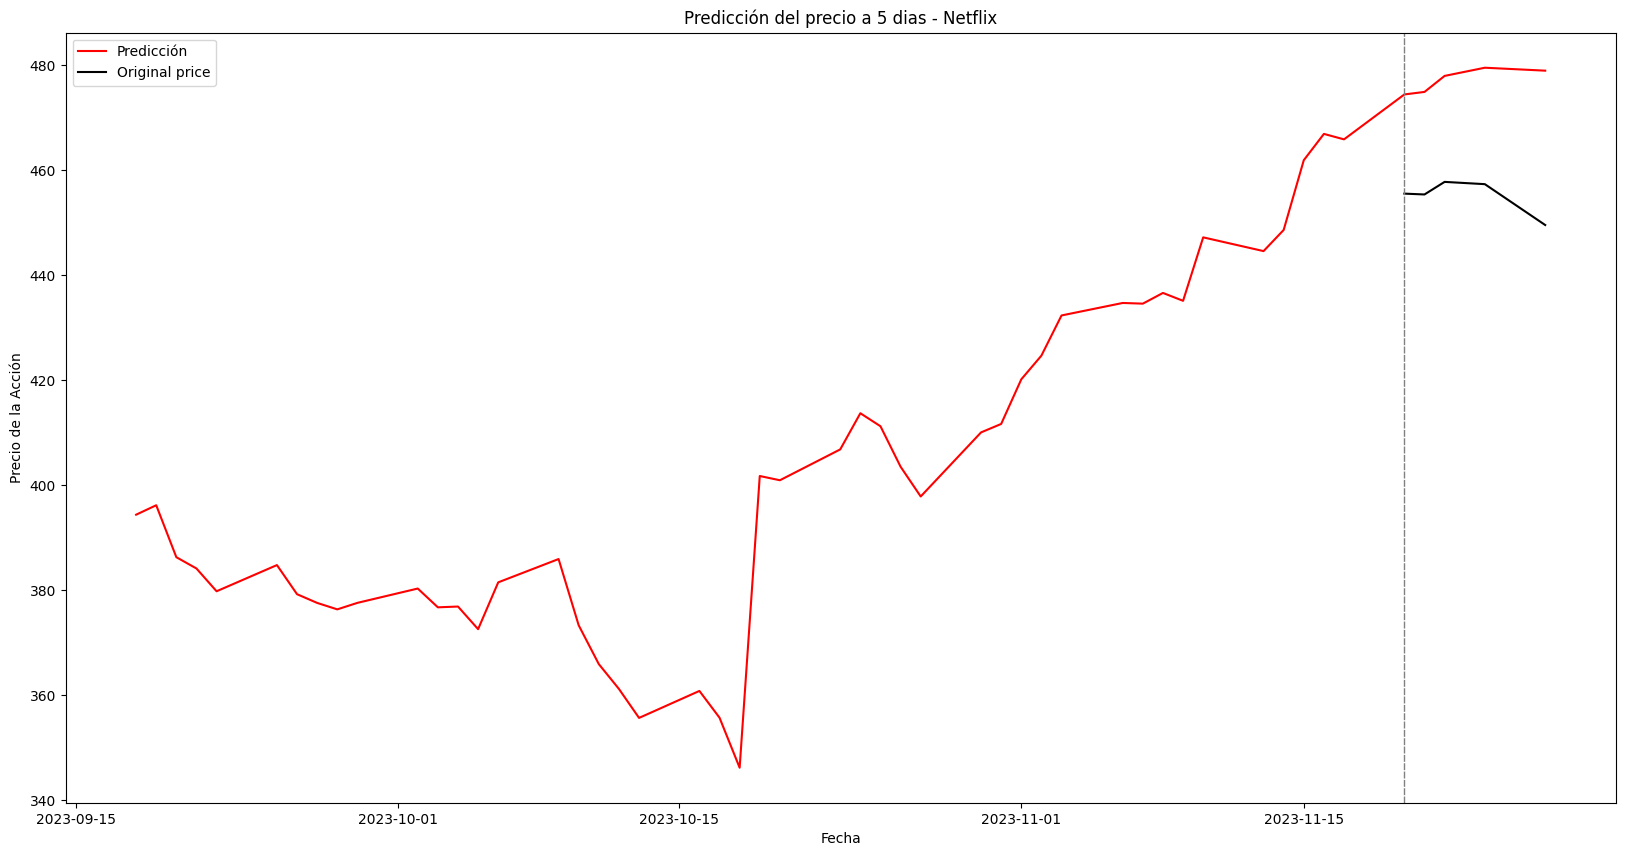

In [128]:
# Visualising the results
plt.plot(last50.Date,last50.Close, color = 'red', label = 'Predicción')
plt.plot(last50.Date.tail(5),Next5Days, color = 'black', label = 'Original price')
plt.axvline(last50.Date.iloc[-5],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 5 dias - Netflix')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=nflx_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

# Modelo para 20 dias

In [129]:

# Multi step data preparation
 
# split into samples
X_samples = list()
y_samples = list()
 
NumerOfRows = len(X)
TimeSteps=120  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=20 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)
 
################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(5276, 120, 1)
### Output Data Shape ###
(5276, 20)


In [130]:

# Choosing the number of testing data records
TestingRecords=20
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
 
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(5256, 120, 1)
(5256, 20)

#### Testing Data shape ####
(20, 120, 1)
(20, 20)


In [131]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 120
Number of Features: 1


In [132]:
keras.utils.set_random_seed(42)
 
# Initialising the RNN
regressor_20 = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor_20.add(LSTM(units = 10, activation = 'tanh', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
 
# Adding the Second hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))
 
# Adding the Third hidden layer and the LSTM layer
regressor_20.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor_20.add(Dense(units = FutureTimeSteps))
 
# Compiling the RNN
regressor_20.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
###################################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor_20.fit(X_train, y_train, batch_size = 10, epochs = 20)
 
EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/20
526/526 [==============================] - 33s 57ms/step - loss: 0.0285
Epoch 2/20
526/526 [==============================] - 30s 56ms/step - loss: 0.0024
Epoch 3/20
526/526 [==============================] - 31s 59ms/step - loss: 0.0015
Epoch 4/20
526/526 [==============================] - 31s 59ms/step - loss: 0.0014
Epoch 5/20
526/526 [==============================] - 31s 60ms/step - loss: 0.0012
Epoch 6/20
526/526 [==============================] - 31s 59ms/step - loss: 0.0012
Epoch 7/20
526/526 [==============================] - 31s 60ms/step - loss: 0.0012
Epoch 8/20
526/526 [==============================] - 31s 60ms/step - loss: 0.0011
Epoch 9/20
526/526 [==============================] - 31s 59ms/step - loss: 0.0010
Epoch 10/20
526/526 [==============================] - 31s 60ms/step - loss: 9.9243e-04
Epoch 11/20
526/526 [==============================] - 31s 60ms/step - loss: 9.7071e-04
Epoch 12/20
526/526 [==============================] - 32s 60ms/step - loss: 

In [133]:
# Making predictions on test data
predicted_Price = regressor_20.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)
 
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 1s 507ms/step
#### Predicted Prices ####
[[371.43698 369.8172  365.99304 368.247   368.6141  370.64172 374.14444
  373.02505 374.39404 370.07855 372.117   374.29807 371.65125 369.34116
  370.575   369.0205  371.5138  370.52435 373.32367 373.536  ]
 [370.2017  368.68005 365.21487 367.3025  367.80618 369.5824  372.78864
  371.92957 373.15186 369.182   371.1208  373.16174 370.61032 368.544
  369.55234 368.17203 370.46124 369.5607  372.17285 372.48972]
 [369.1735  367.7827  364.58502 366.53915 367.17786 368.72574 371.7143
  371.03586 372.19885 368.4124  370.31586 372.2577  369.7827  367.92578
  368.72183 367.4312  369.61462 368.76743 371.22177 371.59918]
 [368.4643  367.17374 364.22357 366.05746 366.81    368.16077 370.94656
  370.44122 371.53098 367.941   369.79807 371.6465  369.2399  367.56705
  368.1818  366.98883 369.05777 368.26465 370.57962 371.0197 ]
 [367.57117 366.34512 363.4505  365.25107 366.0504  367.3291  370.0722
  369.5927  370.70306 36

In [134]:
# Making predictions on test data
LastDaysPrices=FullData[-140:-20]
 
# Reshaping the data to (-1,1 )because its a single entry
LastDaysPrices=LastDaysPrices.reshape(-1, 1)
 
# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(LastDaysPrices)
 
NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)
 
# Generating the predictions for next 5 days
Next20DaysPrice = regressor_20.predict(X_test)


# Generating the prices in original scale
Next20DaysPrice = DataScaler.inverse_transform(Next20DaysPrice)
Next20DaysPrice

1/1 [==============================] - 0s 32ms/step


array([[398.9355 , 399.36603, 400.12784, 400.08902, 402.85895, 400.96805,
        400.69586, 402.94528, 403.08865, 402.13907, 403.53415, 404.04984,
        402.59793, 403.85458, 401.4077 , 401.561  , 402.12848, 402.1053 ,
        402.26248, 403.6598 ]], dtype=float32)

In [135]:
regressor_20.predict(X_test)

1/1 [==============================] - 0s 27ms/step


array([[0.57652646, 0.5771492 , 0.5782512 , 0.57819504, 0.5822018 ,
        0.5794666 , 0.57907283, 0.58232665, 0.5825341 , 0.5811605 ,
        0.58317846, 0.5839244 , 0.58182424, 0.583642  , 0.58010256,
        0.5803243 , 0.58114517, 0.5811116 , 0.581339  , 0.5833602 ]],
      dtype=float32)

In [136]:
valid_20 = FullData[-20:]

Next20Days = Next20DaysPrice[0]

mse_ls = []

for x in zip(valid_20,Next20Days):
    mse_ls.append(x[0][0]-x[1])

print(np.average(mse_ls))

46.15472259521484


In [137]:
last120 = nflx_hist.tail(120)[['Date','Close']]

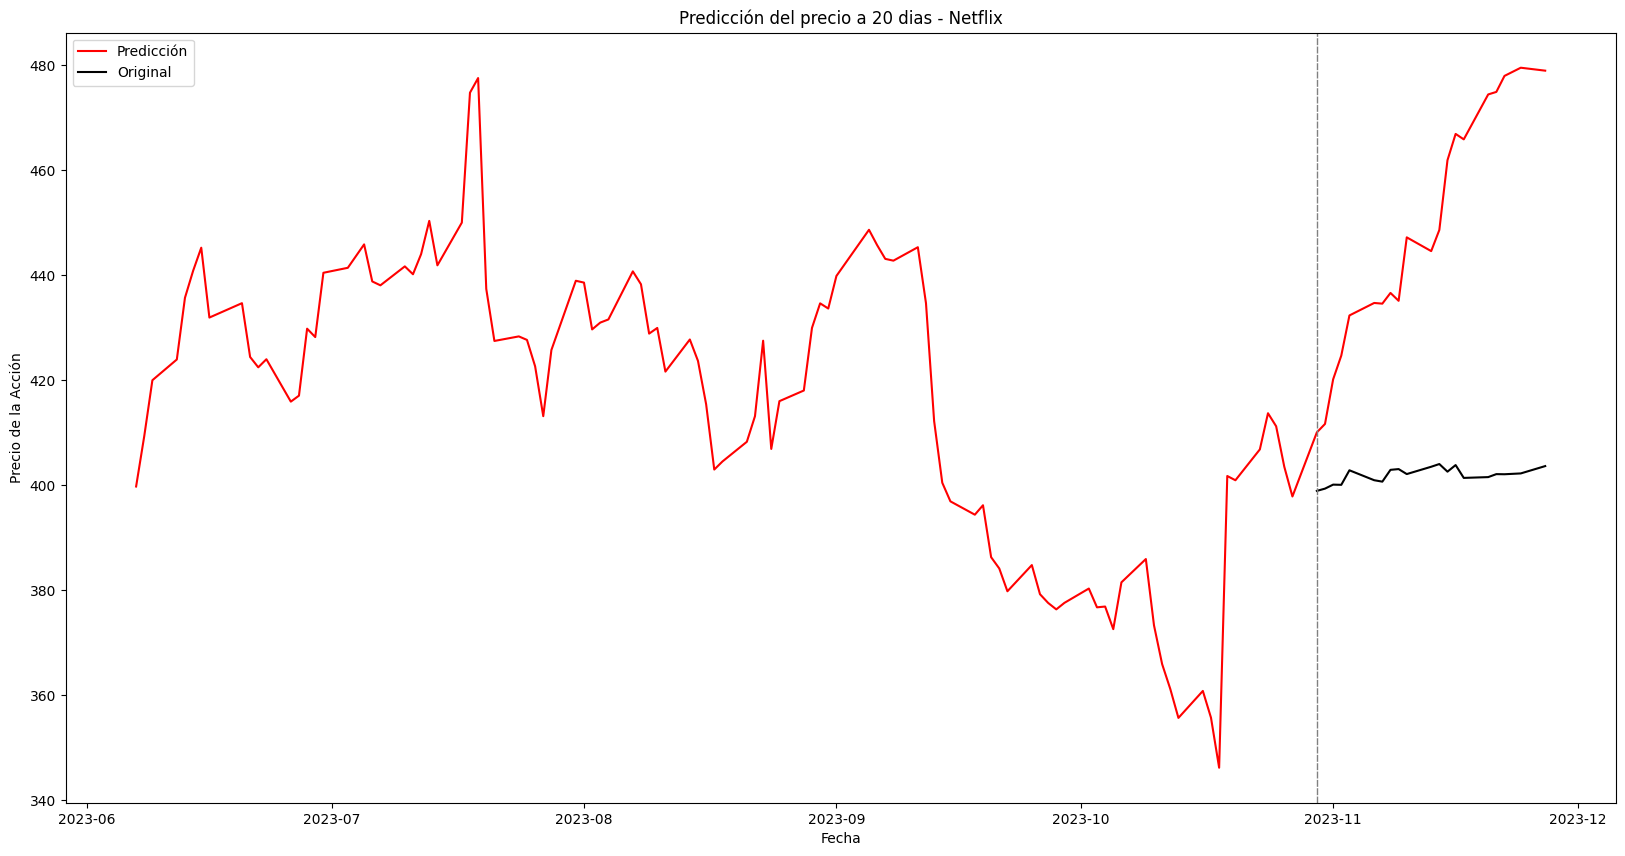

In [138]:
# Visualising the results
plt.plot(last120.Date,last120.Close, color = 'red', label = 'Predicción')
plt.plot(last120.Date.tail(20),Next20Days, color = 'black', label = 'Original')
plt.axvline(last120.Date.iloc[-20],linestyle=(0, (5, 1)), linewidth=1, color="gray")

plt.title('Predicción del precio a 20 dias - Netflix')
plt.xlabel('Fecha')

#startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
#endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
TotalRows=nflx_hist.shape[0]

#plt.xticks(last120.Date)
plt.ylabel('Precio de la Acción')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()